<a href="https://colab.research.google.com/github/gon2gon2/first/blob/master/houseprice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Understand the problem

## 2. Univariable study
      -dependent variable(SalePrice) 종속변수에 대한 탐색
## 3. Multivariate study
      종속변수와 독립변수가 어떤 관계를 갖는지
## 4. Basic cleaning

## 5. Test assumptions

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from scipy.stats import norm     #정규분포
from sklearn.preprocessing import StandardScaler #StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
#bring in the six packs
df_train = pd.read_csv('train.csv')

In [0]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 1. Understand the problem
이 사람은 문제에 대해 이해하기 위해 아래의 항목들로 따로 엑셀 스프레드시트를 만들었다고 한다. 그리고 이런 행동은 육감(sixth sense)을 기르는데 도움이 된다고 함.

- Variable - Variable name.
- Type - numerical / categorical인가
- Segment - building(물리적 특징(OverallQual)) / space(지하실 면적(TotalBsmtSF)) / location(집의 위치에 대한 정보(Neighborhood))
- Expectation - High / Medium / Low      SalePrice에 얼마나 영향을 줄 것인가에 대한 예측
- Conclusion - High / Medium / Low      SalePrice에 얼마나  영향을 주었는가에 대한 결론
- Comments - Any general comments that occured to us.

엑셀의 Expectation column에 값을 채우기 위해선, 각 변수에 대한 설명들을 하나씩 다 읽어보고, 다음과 같은 질문을 해야 한다.
- 우리가 이 상황에서 이런 변수를 생각한 적이 있나? 
- 만약 그렇다면, 어느 정도로 중요할까?
- 이미 다른 변수로 설명되지 않았을까?(LandContour(등치선, 윤곽선, 등고선 / Landslope)

글쓴이가 이러한 과정들을 거친 뒤, 다음과 같은 변수들이 중요하다고 생각되었다
- OverallQual.
- YearBuilt.
- TotalBsmtSF.
- GrLivArea.

- two 'building' variables ('OverallQual' and 'YearBuilt') 

- two 'space' variables ('TotalBsmtSF' and 'GrLivArea')

## 2.First things first: analysing 'SalePrice'


In [0]:
#descriptive statistics summary     'SalesPrice'에 대해서
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

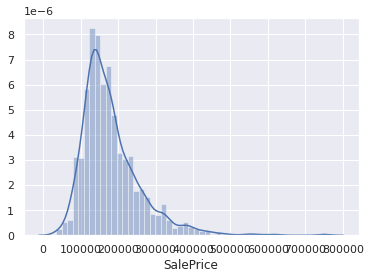

In [0]:
#histogram 도수 분포도, 막대그래프
sns.distplot(df_train['SalePrice']);

- Deviate from the normal distribution. (정규분포에서 벗어났다)
- Have appreciable positive skewness. (주목할만한 편포도(비대칭도)를 가졌다.)
- Show peakedness. (뾰족하다)

In [0]:
print("Skewness: %f" % df_train['SalePrice'].skew())       #왜도
print("Kurtosis: %f" % df_train['SalePrice'].kurt())       #첨도(얼마나 뾰족한지)

Skewness: 1.882876
Kurtosis: 6.536282


## 'SalePrice' 에 대한 분석
### 'GrLivArea', 'TotalBsmtSG' / 'OverallQual' and 'YearBuilt' 들과 함께       

#### Relationship with numerical variables (scatter plot 이용)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


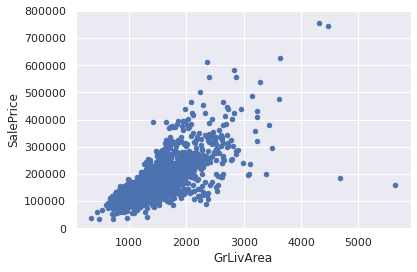

In [0]:
#scatter plot grlivarea/saleprice                      
var = 'GrLivArea'    #var마다 변수명을 달리해서 복붙하려는 생각, 모양을 볼 것
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

linear relationship (statistical term used to describe a straight-line relationship)

선형 관계(직선의 관계를 묘사하기 위해 쓰이는 통계학 단어)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


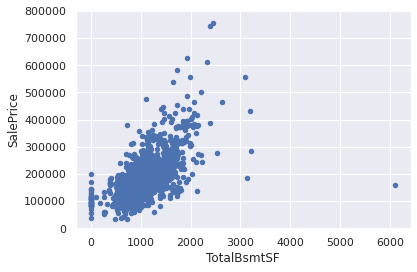

In [0]:
#scatter plot totalbsmtsf/saleprice         
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Relationship with categorical features(box plot 이용)

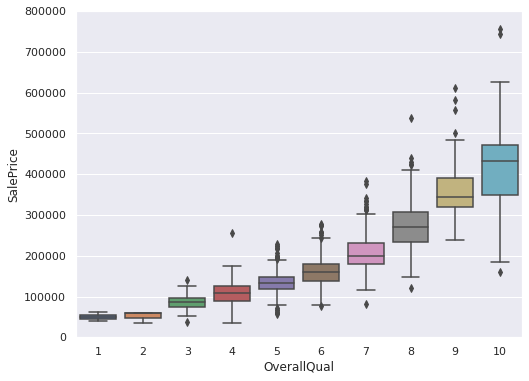

In [0]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

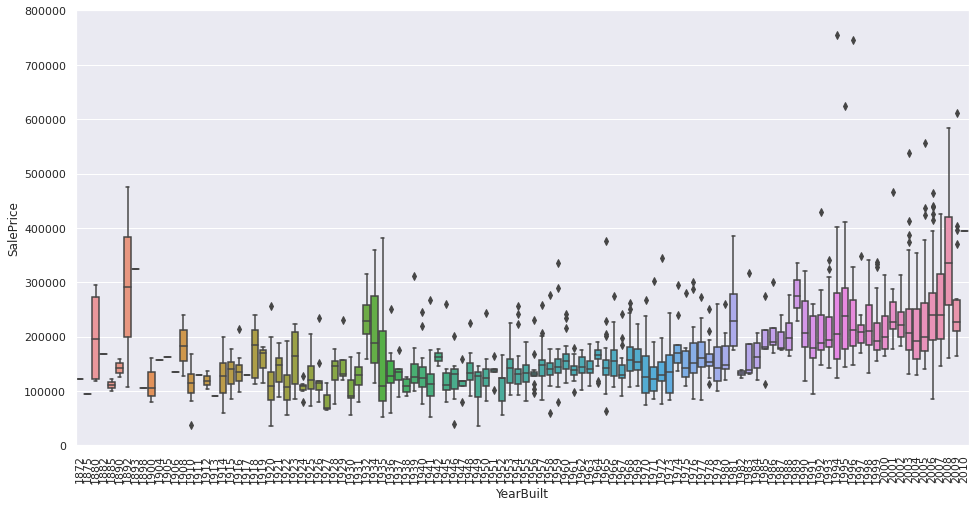

In [0]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

- 'GrLivArea' and 'TotalBsmtSF'는 'SalePrice' 와 선형적 관계처럼 보였다.(positive)
'TotalBsmtSF'의 경우에는 부분적으로 특히 높았다.
- 'OverallQual' and 'YearBuilt' 와 SalePrice는 어느정도 관계가 있어 보이지만, OverallQual의 관계가 더 강해보인다.

## 3.Multivariate study(다변량 분석)

-Correation matrix(heatmap style)

-'SalePrice' correalation matrix (zoomed heatmap style).

-Scatter plots between the most correlated variables

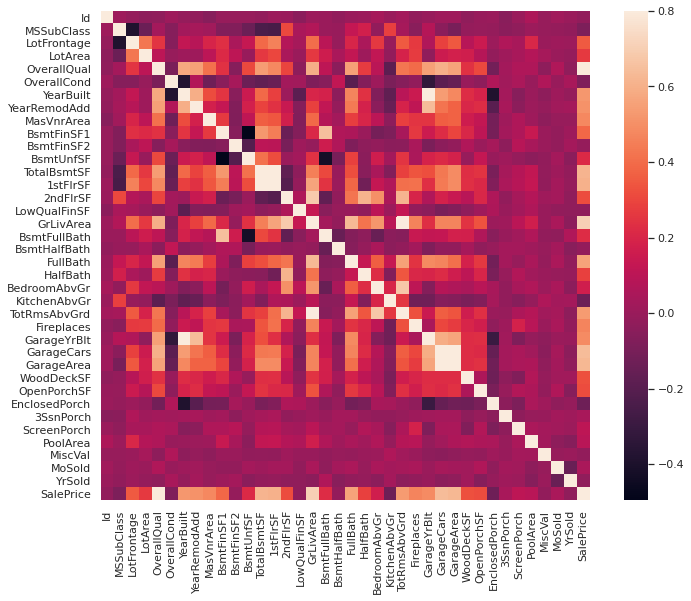

In [0]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
#square 정사각형으로 만들어줘

첫번째로 눈에 띈 것은  'TotalBsmtSF' and '1stFlrSF'
두번째는 'GarageX' variables
하지만 이런 강한 관계의 경우, 다중공선성의 문제를 나타내기도 한다. 
다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다.

우리가 봤던 대로'GrLivArea', 'TotalBsmtSF', and 'OverallQual'과 강한 관계를 보여준다.
뿐만 아니라 우리가 고려해야할 다양한 변수들도 더 보인다.

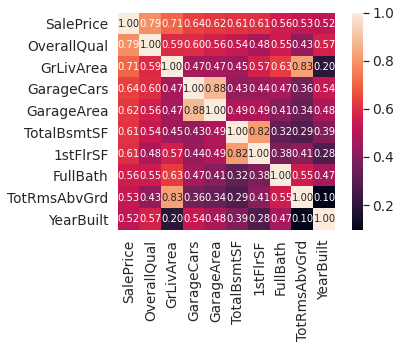

In [0]:
#saleprice correlation matrix
k = 10 #heatmap에 표시할 변수의 개수
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


- OverallQual, GrLivArea, and TotalBsmtSF는 SalePrice와 강력한 연관이 있다는 것을 확인!
- **GarageCars** 와 GaragaeArea는 강한 변수이긴 하지만, 서로 쌍둥이같은 변수이다.
- **TotalBsmtSF**와 1stFloor도 마찬가지.
- TotRmsAbvGrd 와 **GrLivArea**

Scatter plots between 'SalePrice' and correlated variables

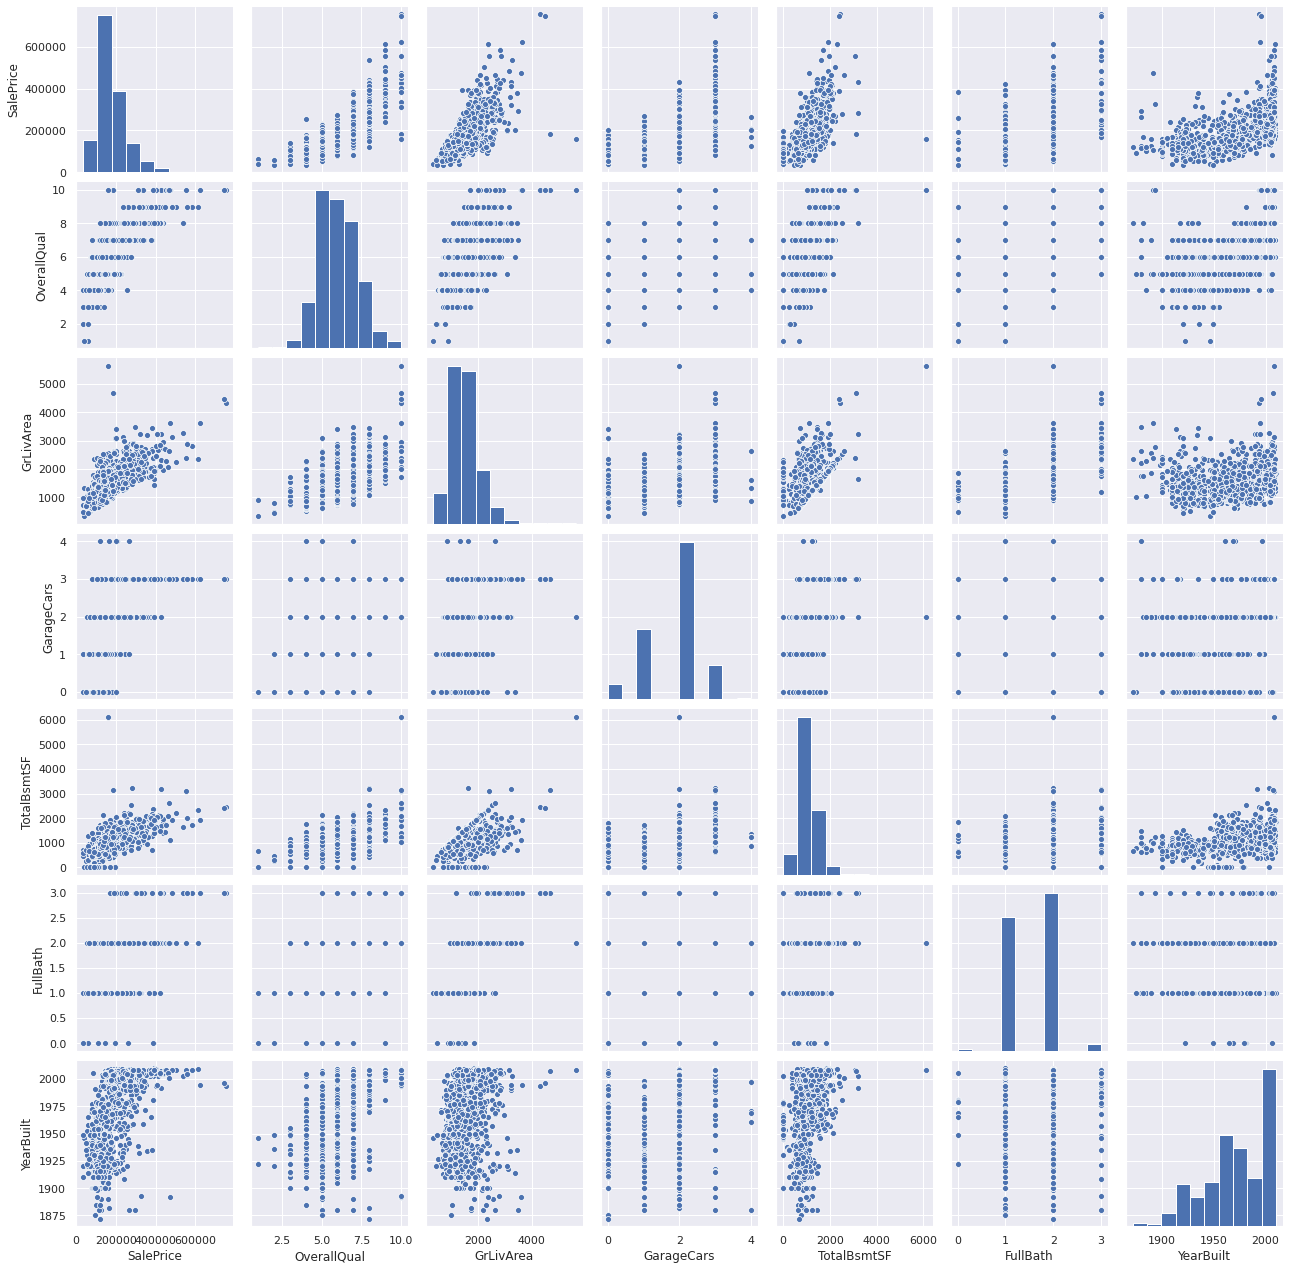

In [0]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

우리가 찾은 것은 TotalBsmtSF와 GrLiveArea 사이에 있다. 여기서 우리는 점들이 선을 그리는 것을 관측할 수 있다.
대부분의 점이 선 아래에 위치한 것을 알 수 있는데, 지하가 지상과 크기가 똑같을 수는 잇지만, 더 커질 수는 없다는 것이다.

SalePrice와 Yearbuilt의 'dots cloud' 밑에서 우리는 shy한 exponential function을 볼 수 있다.
더 창의적으로 생각해보면 그 위도 같은 현상이 있을 것이라 상상할 수 있다.

## 4.Missing data


우리가 missing data에 대해 생각할 때 중요한 것이 있다
1.  How prevalent is the missing data? (prevalent: 널리 퍼진)

2.  Is missing data random or does it have a pattern?
결측치는 무작위로 있을까 패턴이 있을까?

In [0]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False) #null값이 많은 것부터 내림차순 정렬
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False) #비율
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])#total과 percent를 보기 좋게 합쳐준다.
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


결측치가 15%가 넘으면 존재하지도 않았던 것처럼 간주하고 없애버릴 것이다.
이 데이터들은 우리가 집을 살 떄 중요하게 생각하는 특성이 아니다.(글쓴이: 그래서 값이 없는 것은 아닐까?)

In [0]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index) # electrical의 경우에는 관측값만 지움(관측값이 하나니까)
df_train.isnull().sum().max() #missing data가 있는 column이 잘 지워졌나 확인

0

### Univariate analysis(단변량 분석)


outlier를 구분해낼 경계를 정하는 것이 중요하다.
In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.(0~1

In [0]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:20]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]
 [-1.54113464]
 [-1.52225288]
 [-1.52225288]
 [-1.52225288]
 [-1.50966503]
 [-1.49225604]
 [-1.46560758]
 [-1.44043189]
 [-1.43413797]
 [-1.43413797]]

outer range (high) of the distribution:
[[3.08489782]
 [3.13524919]
 [3.22530263]
 [3.24577046]
 [3.26112763]
 [3.33994012]
 [3.41155236]
 [3.57582371]
 [3.59470548]
 [3.70170215]
 [3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### 표준정규분포 표준화(아래에 있는 거)
 - Numpy : z = (x - mean())/std()


 - scipy.stats : zscore()

 - sklearn.preprocessing : StandardScaler().fit_transform()


출처: https://rfriend.tistory.com/tag/StandardScaler(data).fit_transform(data) [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [0]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]); #standard_scaler()는 평균이 0, 표준편차가 1이 되도록 
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


- Low range values are similar and not too far from 0.(낮은 범위의 값은 비슷하고 0으로부터 그다지 멀지 않다.)
- High range values are far from 0 and the 7.something values are really out of range.(그러나 High range의 값들은 0에서 굉장히 멀고, 7.XXX의 값들은 범위에서 벗어나있다.)
- For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.(이 값들을 outlier로 구분하진 않겠지만, 7.XXX의 값을 다룰 땐 조심해야 한다.)



## Bivariate analysis (이변량 분석: 두개의 변수를 갖는 분석)

우리는 이미 scatter plot을 알고 있다. 그러나 새로 발견할 것은 늘 있다.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


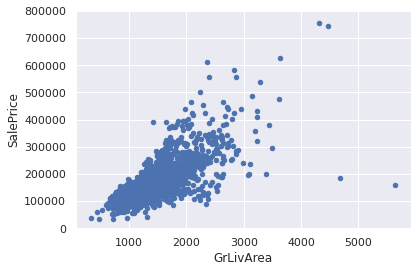

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### 새로운 발견

- 큰 값을 갖는 2개의 점이 crowd를 따르지 않는다. 그 이유에 대해 추측해볼 수 있는데, 아마 농업용지여서 싼 값에 나와씅ㄹ 것이다. 확신할 수는 없지만, 전형적인 case는 아니다. 그러므로 저 둘을 outlier로 간주하고 지워버린다.
- 7.XXX의 큰 값ㅇ르 갖는 두개의 점은 특별한 case긴 하지만 trend를 따르는 것으로 보이므로 내버려 둔다.


In [0]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]  #오른쪽에 이상한 점 2개, 각각 ID가 1299,524임
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


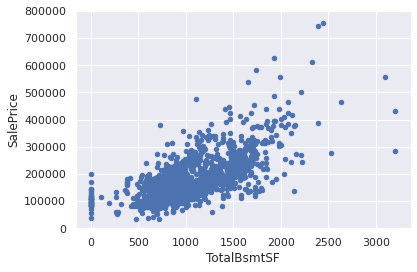

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

3000 너머의 값을 제거해야할 것 같지만 그렇게 큰 의미는 없을 것 같다. 내버려 둔다.



# 5. Test assumption

이제 우리는 SalePrice에 대해 더 깊게 이해해야한다. 


According to Hair et al. (2013), four assumptions should be tested:https://amzn.to/2uC3j9p

Hair에 따르면 우리는 4가지를 검증해 봐야 한다.

- Nomality(정규성): 정규분포를 따르는가?
몇몇의 통계 검증이 정규분포에 의존하므로 중요하다.
여기선 SalesPrice에 대한 일변수 정규성만 확인할 것이다. 
- Homoscedasticity(등분산성): 분산의 동질성, 분산이 같음을 의미(분산분석을 통해 서로 다른 두개 이상의 집단을 비교할 때, 해당 집단들이 만족해야하는 조건 중 한가지)
- Linearity(선형성): 선형성을 평가하는 가장 흔한 방법은  scatter plot과 linear patters이다. 우리가 본 대부분의 scatter plots은 선형 관계를 띄는 것으로 보였기 떄문에 **더 깊게 들어가지 않는다.**
- Absence of correlated errors(상관 오류의 부재): 어떤 패턴이 시간과 관련되어있을 때, 시계열에서 자주 발생한다.(시계열: 시계열은 일정 시간 간격으로 배치된 데이터들의 수열)**여기서도 더이상 다루진 않을 것이다.**


### In the search for normality


우리가 주의깊게 보아야 할 것은 다음과 같다.
- Histogram - Kurtosis and skewness
- Normal probability plot(정규확률도) - 데이터 분산은 사선에 가깝워야 한다.(정규분포를 의미한다.) 

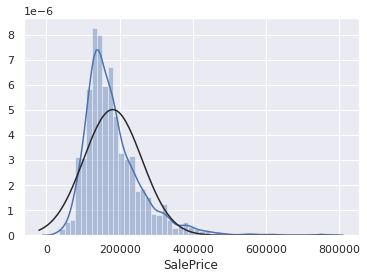

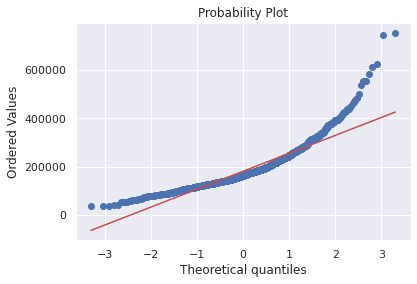

In [0]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

SalePrice는 정규분포가 아닌 Peakedness을 보였다. 
이런 경우에는 로그 변환으로 간단히 해결할 수 있다.

In [0]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

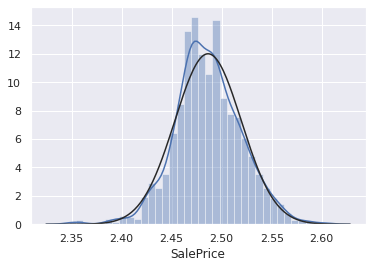

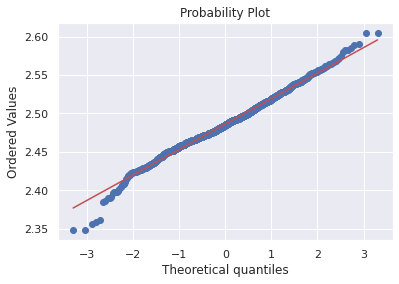

In [0]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

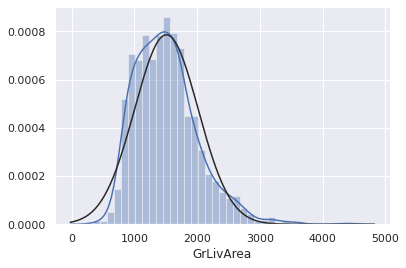

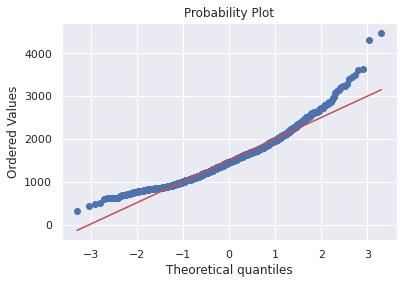

In [0]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

여기서도 로그 변환을 이용해보자.

In [0]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

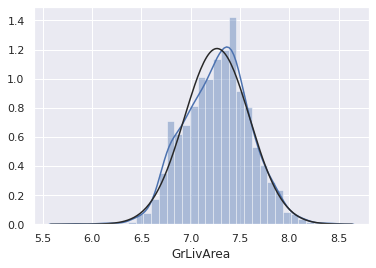

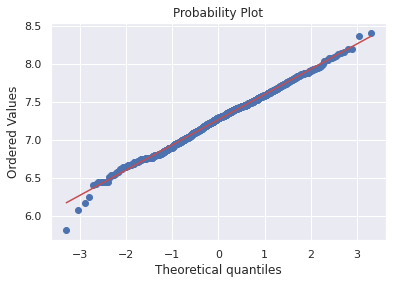

In [0]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

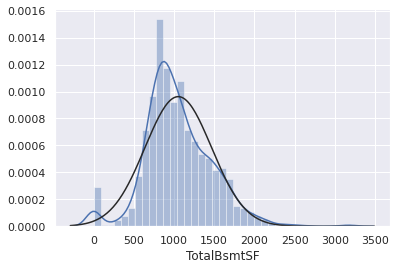

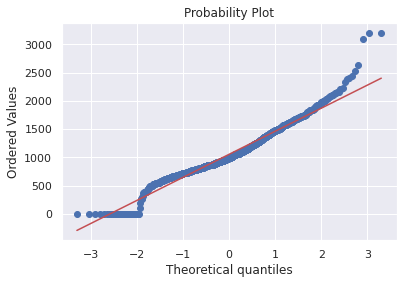

In [0]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

좀 심각해보인다. 이녀석은 어떻게 할까?


In [0]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

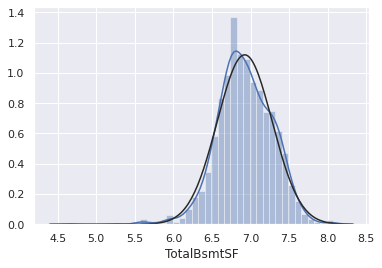

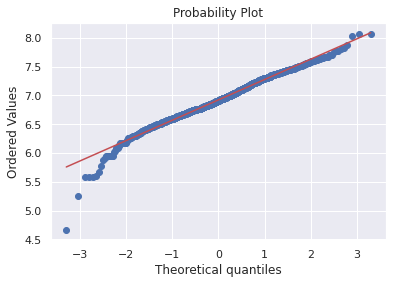

In [0]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

이변수의 homoscedasticity를 테스트하는 최고의 방법은 그래픽으로 확인하는 것이다.
by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution). 

### SalePrice' and 'GrLivArea'

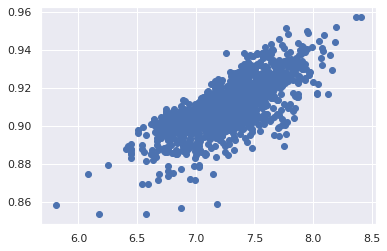

In [0]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);


아까의 plot은 conic shpae 였던 것에 반해, 지금의 plot에서는 conic shape를 찾아볼 수 없다.

이번엔 SalePrice와 TotalBsmtSF에 대해 알아보자


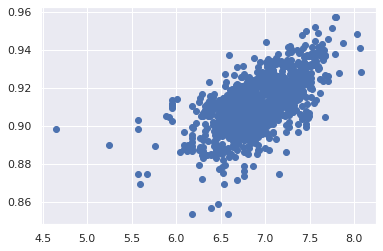

In [0]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

일반적으로, SalePrice는 TotalBsmtSF와 같은 수준의 변량을 보여준다 말할 수 있겠다.

### Last but not the least, dummy variables

In [0]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HasBsmt,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,6.752270,856,854,0,7.444249,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,0.918424,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,7.140453,1262,0,0,7.140453,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,0.913868,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,6.824374,920,866,0,7.487734,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,0.920679,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,6.628041,961,756,0,7.448334,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,0.905140,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,7.043160,1145,1053,0,7.695303,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,0.924279,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
